# Logistic Regression

It is a statistical method for analyzing a data set in which there are one or more independent variables that determine an outcome. The outcome is measured with a $dichotomous$ variable (in which there are only two possible outcomes). 
<br>
<br>
The goal of logistic regression is to find the bestfitting model to describe the relationship between the dichotomous characteristic of interest ( dependent variable = response or outcome variable) and a set of independent (predictor or
explanatory) variables.
<br>
<b>Linear Regression and Logistic Regression are the two famous Machine Learning Algorithms. The Linear Regression is used for solving Regression problems whereas Logistic Regression is used for solving the Classification problems.</b>


Logistic regression is based on the concept of $ Maximum$ $Likelihood$ $estimation$. According to this estimation, the observed data should be most probable.
<br>
<br>
In logistic regression, we pass the weighted sum of inputs through an activation function that can map values in between 0 and 1. 
<br>Such activation function is known as <b>sigmoid function</b> and the curve obtained is called as sigmoid curve or S-curve.

###### 1. import the necessary libraries

In [1]:
import pandas as pd # for reading the file, manipulation and analysis in dataframe
import numpy as np # provide mathamtical functions
import seaborn as sns # interative Graphs 
import warnings # for ignoring the warnings 
warnings.filterwarnings("ignore")
warnings.warn('my warning')

In [2]:
db_data=pd.read_csv('diabetes.csv')
db_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# shape of the dataset
db_data.shape

(768, 9)

In [4]:
# Check for the objects in the dataset
db_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Check for the Null column values in the dataset
db_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

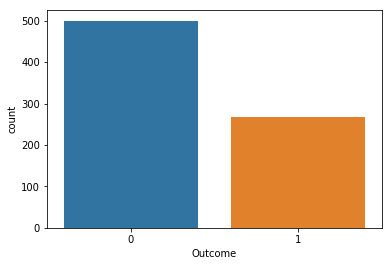

In [6]:
# check for the positive and negative labels.
sns.countplot(x="Outcome",data=db_data)

In [7]:
X=db_data.drop(['Outcome'],axis=1) 
y=db_data['Outcome']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred=classifier.predict(X_test)
# Checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7532467532467533

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[126  25]
 [ 32  48]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.60      0.63        80

    accuracy                           0.75       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

AUC: 0.71722


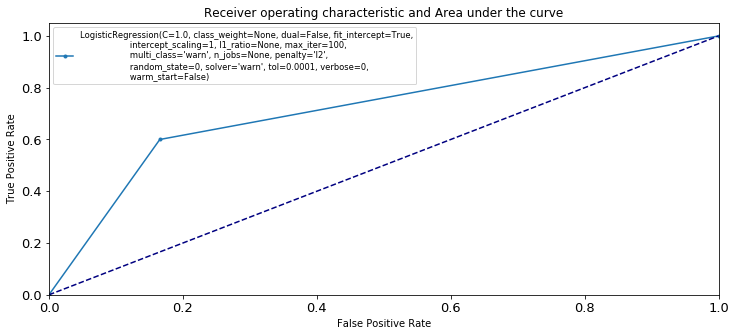

In [14]:
plt.subplots(figsize=(12,5)) 
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.5f' % auc)
plt.plot(fpr, tpr,marker='.',label=classifier)
# plot no skill
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
 # plot the roc curve for the model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic and Area under the curve', fontsize=12)
plt.legend(loc=0,fontsize='small')
plt.tick_params(axis='both', which='major', colors='black', labelsize=13)
plt.show()